In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [3]:
dfx = pd.read_csv("weightedX.csv")
dfy = pd.read_csv("weightedY.csv")

In [4]:
X = dfx.values
Y = dfy.values

In [5]:
print(X.shape)
print(Y.shape)

(99, 1)
(99, 1)


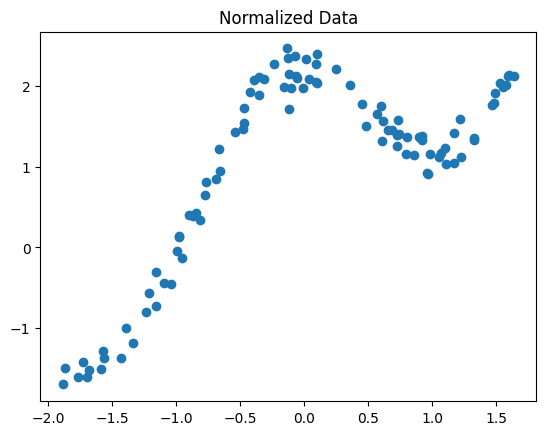

In [7]:
u = X.mean()
std = X.std()
X = (X-u)/std
plt.title("Normalized Data")
plt.scatter(X, Y)
plt.show()

In [ ]:
def getW(query_point, X, tau):
    M = X.shape[0]
    W = np.mat(np.eye(M))
    x = query_point
    for i in range(M):
        xi = X[i]
        W[i, i] = np.exp(-np.linalg.norm(xi - x) ** 2 / (2 * tau * tau))
    return W

In [24]:
X = np.mat(X)
Y = np.mat(Y)
M = X.shape[0]
W = getW(-1, X, 0.5)
print(W.shape)
print(W)

(99, 99)
[[4.37461134e-01 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 9.35741601e-01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 4.34593282e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.29054046e-01
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  5.78787793e-03 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 5.21221566e-05]]


In [25]:
def predict(X, Y, query_x, tau):
    ones = np.ones((M, 1))
    X_ = np.hstack((X, ones))
    qx = np.mat([query_x, 1])
    W = getW(qx, X_, tau)
    theta = np.linalg.pinv(X_.T*(W*X_))*(X_.T*(W*Y))
    pred = np.dot(qx, theta)
    return theta, pred

In [26]:
theta, pred = predict(X, Y, 1.0, 1.0)

In [27]:
print(pred)

[[1.59417694]]


In [43]:
def plotPrediction(tau):
    X_test = np.linspace(-2, 2, 20)
    Y_test = []
    for xq in X_test:
        _, pred = predict(X, Y, xq, tau)
        Y_test.append(pred[0][0])
    Y_test = np.array(Y_test)
    XO = np.array(X)
    YO = np.array(Y)
    plt.scatter(XO, YO)
    plt.scatter(X_test, Y_test, color="red")
    plt.title(tau)
    plt.show()

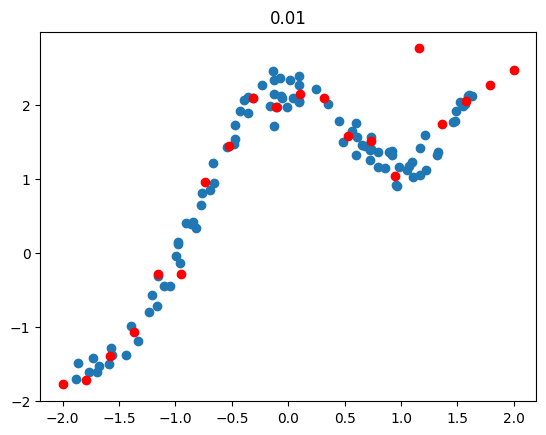

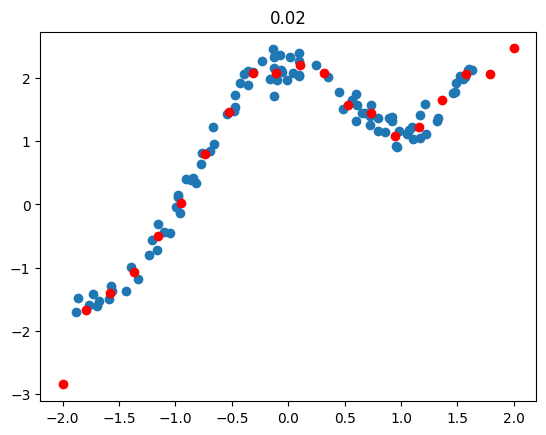

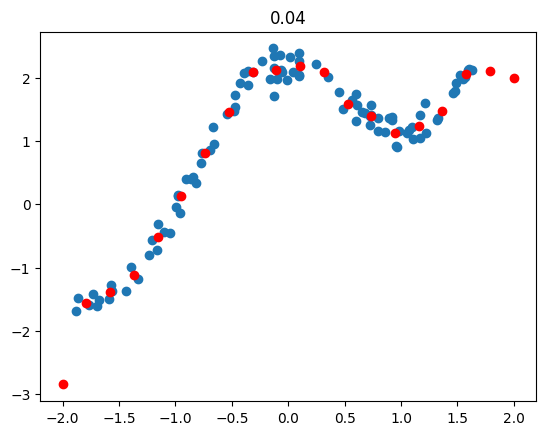

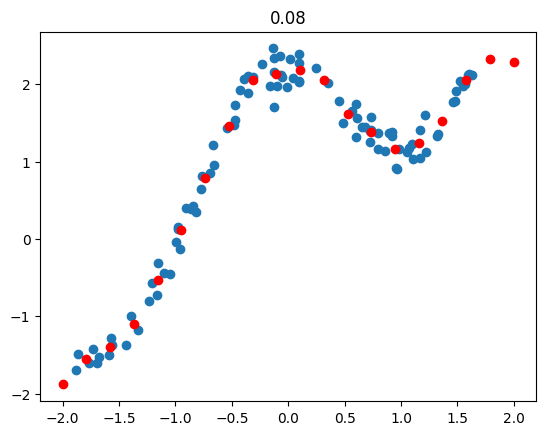

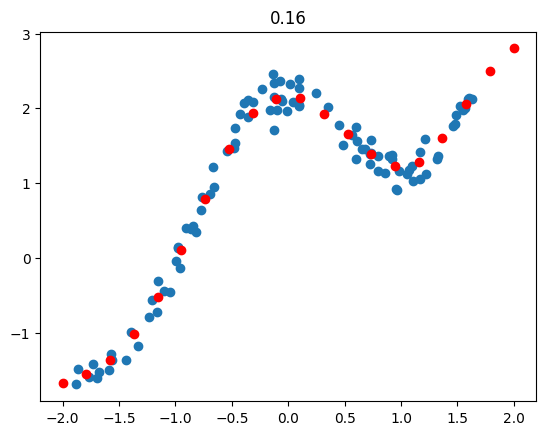

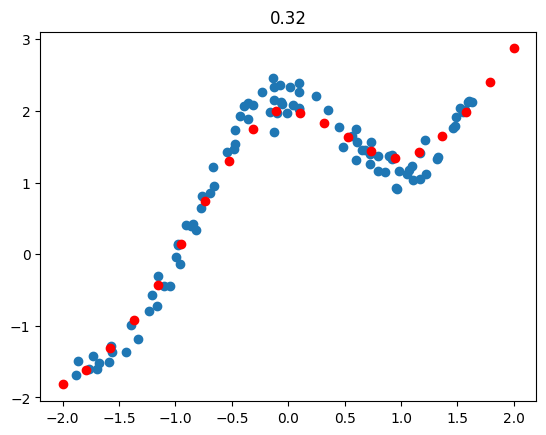

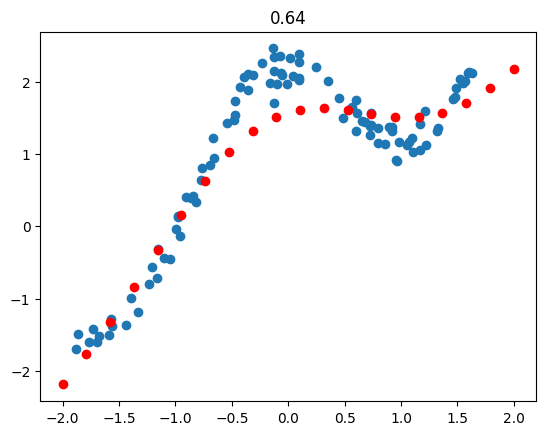

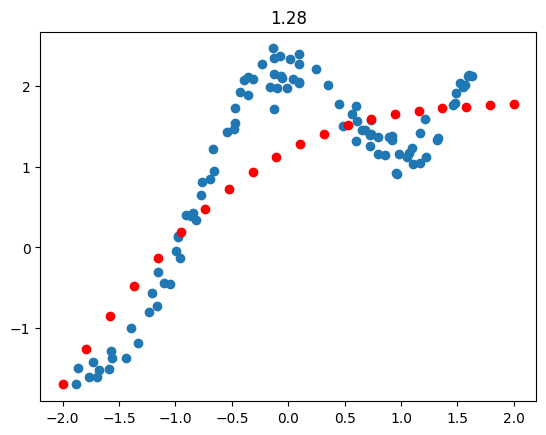

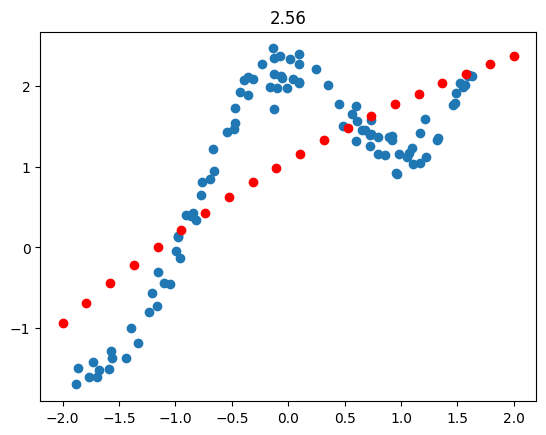

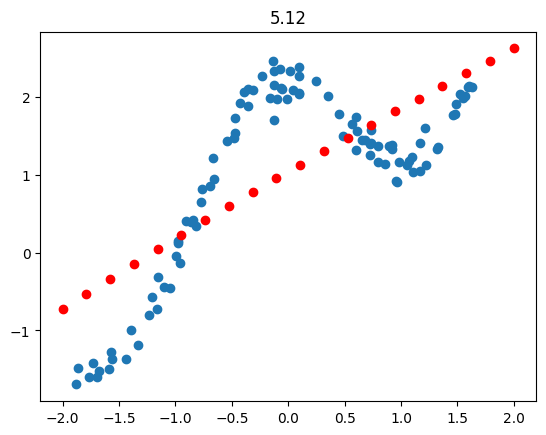

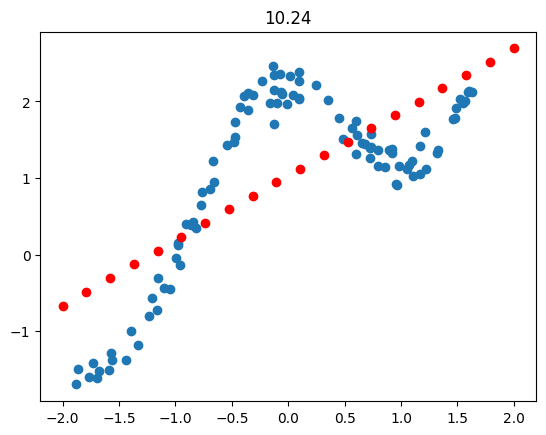

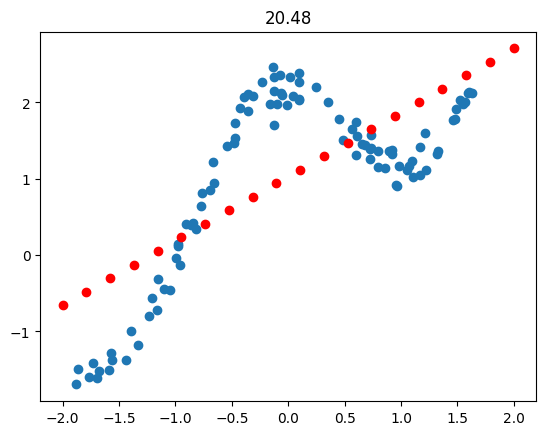

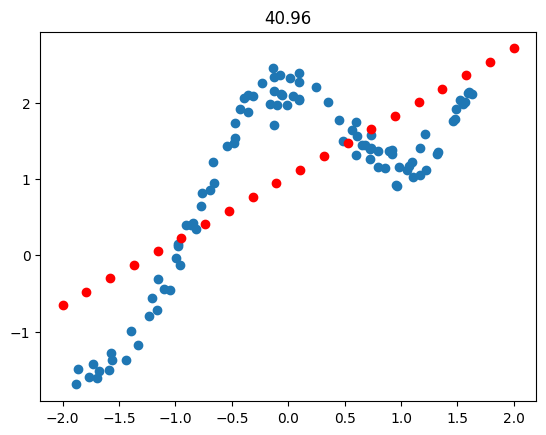

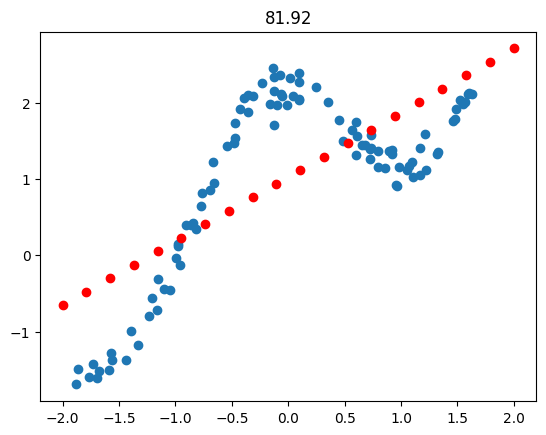

In [45]:
t = 0.01
while t < 100:
    plotPrediction(t)
    t*=2